# Funciones de distribución de probabilidades
## Distribución Uniforme

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([100332.,  99840., 100048.,  99863., 100127.,  99917.,  99844.,
        100454., 100024.,  99551.]),
 array([ 1.00023049, 10.90020307, 20.80017565, 30.70014823, 40.60012081,
        50.50009339, 60.40006596, 70.30003854, 80.20001112, 90.0999837 ,
        99.99995628]),
 <BarContainer object of 10 artists>)

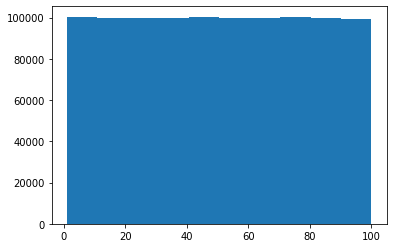

In [4]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [5]:
data = np.random.randn(1000000)

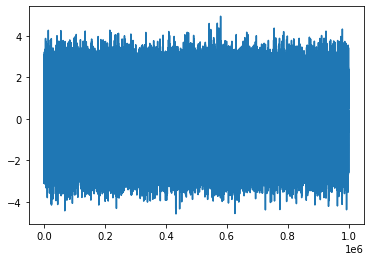

In [6]:
x = range(1,1000001)
plt.plot(x, data)

(array([1.35000e+02, 3.74300e+03, 3.84670e+04, 1.78429e+05, 3.52016e+05,
        2.99480e+05, 1.09377e+05, 1.72200e+04, 1.09600e+03, 3.70000e+01]),
 array([-4.5855181, -3.6317666, -2.6780151, -1.7242636, -0.7705121,
         0.1832394,  1.1369909,  2.0907424,  3.0444939,  3.9982454,
         4.9519969]),
 <BarContainer object of 10 artists>)

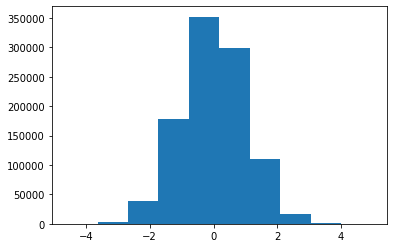

In [7]:
%matplotlib inline
plt.hist(data)

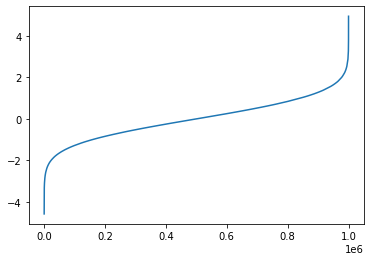

In [8]:
plt.plot(x,sorted(data))

(array([   9.,  118.,  625., 1980., 3099., 2578., 1262.,  303.,   22.,
           4.]),
 array([-4.24544334, -2.1910613 , -0.13667927,  1.91770277,  3.97208481,
         6.02646684,  8.08084888, 10.13523092, 12.18961296, 14.24399499,
        16.29837703]),
 <BarContainer object of 10 artists>)

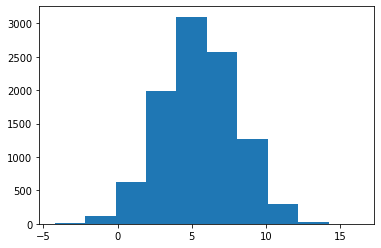

In [9]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [10]:
data = np.random.randn(2,4)
data

array([[ 1.37456702, -0.08139906, -0.8187742 , -2.38606593],
       [ 0.59154883, -0.45175622,  0.90379334,  0.2532976 ]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [11]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1434460000000013


(3.1434460000000013, [<matplotlib.lines.Line2D at 0x7f9f8f2c99b0>])

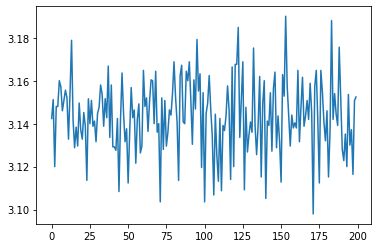

In [12]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [13]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [14]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000029,1.500551,18.507066
std,0.999778,2.497351,7.791499
min,-4.898946,-11.004949,5.000022
25%,-0.674960,-0.184776,11.768172
50%,-0.000987,1.500939,18.509432
75%,0.673646,3.184756,25.259711
max,4.786086,13.682499,31.999998


(array([4.00000e+01, 1.50500e+03, 2.14230e+04, 1.29476e+05, 3.25193e+05,
        3.41678e+05, 1.50474e+05, 2.80500e+04, 2.10400e+03, 5.70000e+01]),
 array([-4.898946  , -3.93044282, -2.96193964, -1.99343647, -1.02493329,
        -0.05643011,  0.91207307,  1.88057625,  2.84907943,  3.81758261,
         4.78608579]),
 <BarContainer object of 10 artists>)

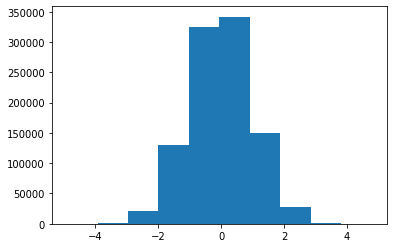

In [15]:
plt.hist(data["A"])

(array([2.50000e+01, 1.17400e+03, 1.95170e+04, 1.25543e+05, 3.27641e+05,
        3.48089e+05, 1.50102e+05, 2.60900e+04, 1.77900e+03, 4.00000e+01]),
 array([-11.00494883,  -8.53620406,  -6.06745928,  -3.59871451,
         -1.12996974,   1.33877503,   3.8075198 ,   6.27626457,
          8.74500934,  11.21375411,  13.68249888]),
 <BarContainer object of 10 artists>)

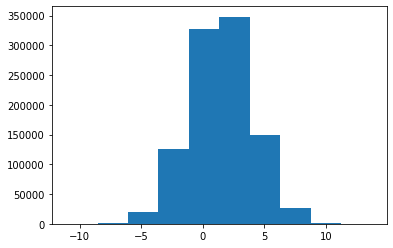

In [16]:
plt.hist(data["B"])

(array([ 99799.,  99513., 100076., 100342.,  99937., 100263.,  99674.,
        100341.,  99937., 100118.]),
 array([ 5.0000221 ,  7.70001973, 10.40001736, 13.10001499, 15.80001262,
        18.50001026, 21.20000789, 23.90000552, 26.60000315, 29.30000078,
        31.99999842]),
 <BarContainer object of 10 artists>)

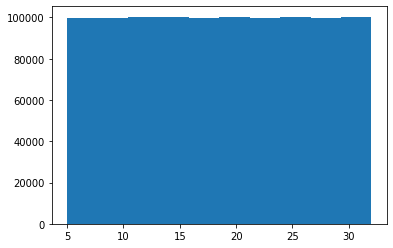

In [17]:
plt.hist(data["C"])

In [18]:
data = pd.read_csv("customer-churn-model/Customer Churn Model.txt")

In [19]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [20]:
colum_names = data.columns.values.tolist()

In [21]:
a = len(colum_names)
a

21

In [22]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [23]:
new_data

,Column Name,A,B
42,State,-0.463101,0.917807
43,Account Length,-1.634439,0.955321
44,Area Code,0.226880,0.950063
45,Phone,0.217818,0.450025
46,Int'l Plan,0.079867,0.399636
47,VMail Plan,-0.219612,0.683142
48,VMail Message,-0.555427,0.639316
49,Day Mins,-0.204756,0.995221
50,Day Calls,-0.326211,0.111585
51,Day Charge,-1.181722,0.541154
